# Principle Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_breast_cancer
dataset =load_breast_cancer(as_frame=True)
#dataset

In [8]:
df = dataset.frame

In [9]:
df.shape

(569, 31)

In [12]:
X = df[dataset['feature_names']]
#X

In [13]:
X.shape

(569, 30)

In [15]:
#Step 1: Standardization
X_mean = X.mean()
X_std = X.std()
z = (X - X_mean)/X_std

<Axes: >

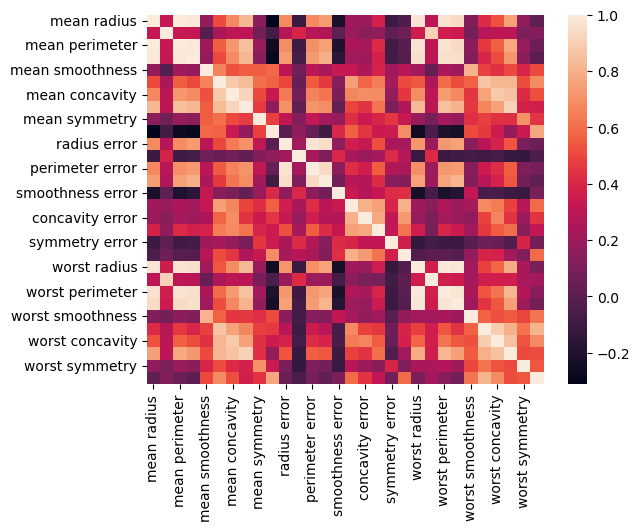

In [16]:
#Step 2: Covariance matrix
corr = z.cov()

import seaborn as sns
sns.heatmap(corr)

In [17]:
#Step 3: Eigen values and Eigen vector

eigenvalues, eigenvectors = np.linalg.eig(corr)

In [18]:
print("Eigen values : ", eigenvalues)
print("Eigen vectors : ", eigenvectors)


Eigen values :  [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen vectors :  [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.037245

In [19]:
eigenvalues.shape

(30,)

In [20]:
eigenvectors.shape

(30, 30)

In [23]:
#Indexing
idx = eigenvalues.argsort()[::-1]

In [24]:
#Sorting of eigen values
eigenvalues = eigenvalues[idx]

In [25]:
#Sorting of eigen vectors
eigenvectors = eigenvectors[:,idx]

In [26]:
variance = np.cumsum(eigenvalues)/np.sum(eigenvalues)
variance

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [27]:
#Step 4 : Number of components
n_componenet = np.argmax(variance >=0.50) + 1
n_componenet

2

In [28]:
#Unit vector
u = eigenvectors[:,:n_componenet]
pca_componenet = pd.DataFrame(u,
                              index=dataset['feature_names'],
                              columns=['PC1','PC2'])


<Axes: >

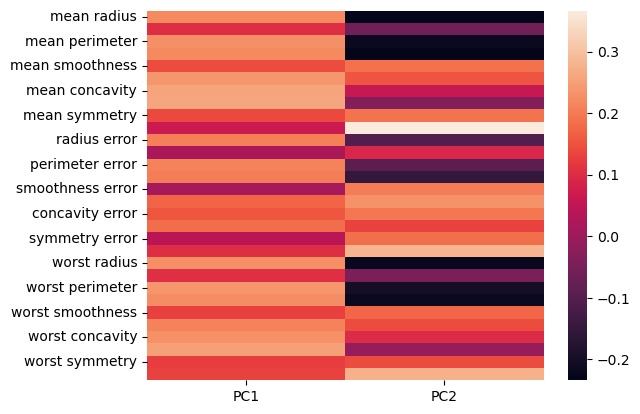

In [41]:
sns.heatmap(pca_componenet)

In [42]:
#Step 5: Dot Product calculation for projection
pca = z @ pca_componenet
pca.rename({'PC1':'PCA1','PC2':'PCA2'}, axis=1, inplace=True)
print(pca)


          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


In [35]:
#Apply PCA
from sklearn.decomposition import PCA
dr = PCA(n_components=2)
dr.fit(z)
dr_pca = dr.transform(z)


In [39]:
df1 = pd.DataFrame(dr_pca, columns=['PC{}'.
                                format(i+1) 
                                for i in range (n_componenet)])

In [40]:
df1

,PC1,PC2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540
